<a href="https://colab.research.google.com/github/Rehaf1/Connect-4/blob/main/Connect4Project_phase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikeras
!pip install -U scikeras scikit-learn tensorflow



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 111.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.layers import LeakyReLU
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import sys
!{sys.executable} -m pip install -q lightgbm
import lightgbm as lgb
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
train_id = "1sZ32GzX58bA4i9-jjlqYDLTeVIBH36TO"
val_id   = "1fgYJeKUuNgVAUrZw9qWh5J5ye8VQbnlA"
test_id  = "1YEWEmUUZ1os75XCSnaJghyxXKPheK1Eo"

train_url = f"https://drive.google.com/uc?id={train_id}"
val_url   = f"https://drive.google.com/uc?id={val_id}"
test_url  = f"https://drive.google.com/uc?id={test_id}"

train_df = pd.read_csv(train_url)
val_df   = pd.read_csv(val_url)
test_df  = pd.read_csv(test_url)

In [4]:


#To check if i did it correctly I'll print the list
print(train_df.columns.tolist())

print("Missing values:", train_df.isnull().sum().sum())

['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p29', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p40', 'p41', 'p42', 'turn', 'label_move_col']
Missing values: 0


In [5]:
#like the homework i'll seperate the x and y
x=train_df.drop("label_move_col",axis=1)
y=train_df["label_move_col"]

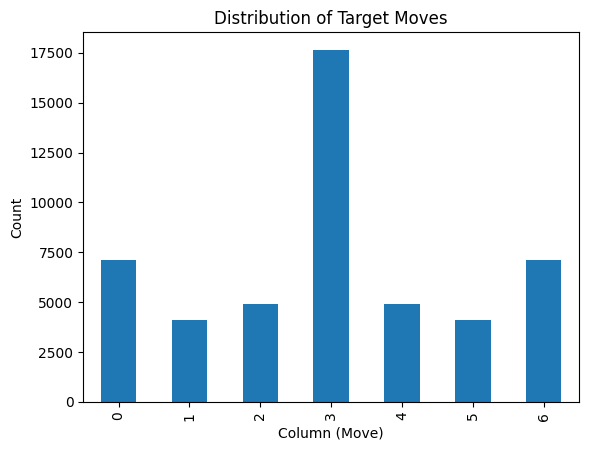

In [6]:
y.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Column (Move)")
plt.ylabel("Count")
plt.title("Distribution of Target Moves")
plt.show()

In [7]:
#Ill begin now with the our first model Decision tree

Dt_model = DecisionTreeClassifier(
    criterion='gini',
    random_state=42,
    class_weight='balanced',
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    max_leaf_nodes=100
)
Dt_model.fit(x,y)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,20
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,100
,min_impurity_decrease,0.0
,class_weight,'balanced'


Training Accuracy: 0.3938
Validation Accuracy: 0.4038


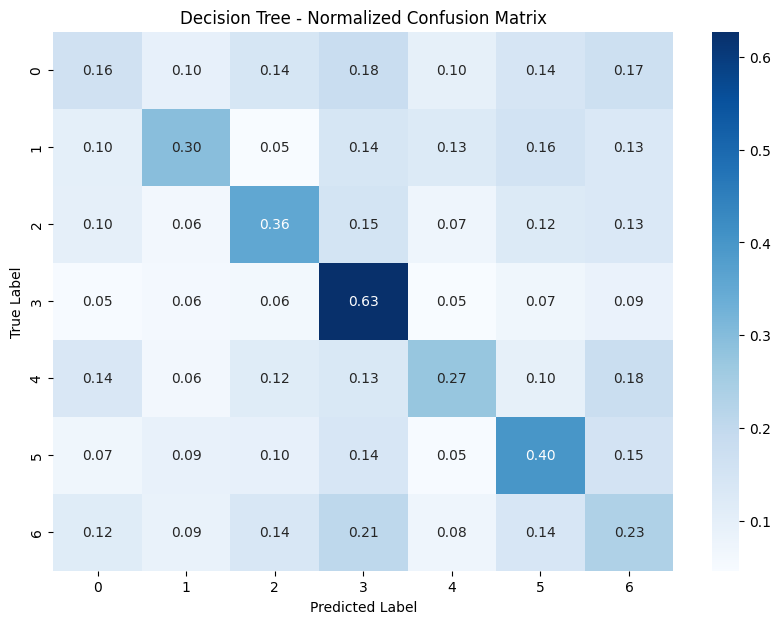

In [8]:
#I will validate the model now based on the validation file on kaggle

x_val=val_df.drop("label_move_col",axis=1)
y_val=val_df["label_move_col"]

# Validation

# Evaluate on training data
y_train_pred = Dt_model.predict(x)
train_acc = accuracy_score(y, y_train_pred)

# Evaluate on validation data
y_val_pred = Dt_model.predict(x_val)
val_acc = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", round(train_acc, 4))
print("Validation Accuracy:", round(val_acc, 4))


cm_dt = confusion_matrix(y_val, y_val_pred)
cm_dt_norm = cm_dt.astype('float') / cm_dt.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,7))
sns.heatmap(cm_dt_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree - Normalized Confusion Matrix")
plt.show()



In [9]:
# Now I try "Logistic Regression" model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(x, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Training Accuracy: 0.3531
Validation Accuracy: 0.3674


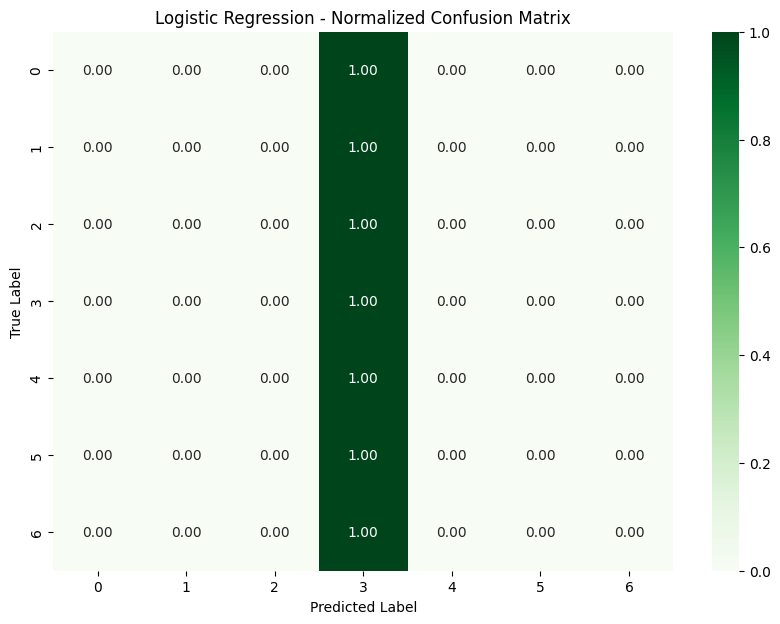

In [10]:
# validate the Logistic Regression model using the validation file

x_val = val_df.drop("label_move_col", axis=1)
y_val = val_df["label_move_col"]

y_val_pred = log_reg_model.predict(x_val)
# Validation

# Evaluate on training data
y_train_pred = log_reg_model.predict(x)
train_acc = accuracy_score(y, y_train_pred)

# Evaluate on validation data
y_val_pred = log_reg_model.predict(x_val)
val_acc = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", round(train_acc, 4))
print("Validation Accuracy:", round(val_acc, 4))

cm_lr = confusion_matrix(y_val, y_val_pred)
cm_lr_norm = cm_lr.astype('float') / cm_lr.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,7))
sns.heatmap(cm_lr_norm, annot=True, fmt=".2f", cmap="Greens",
            xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression - Normalized Confusion Matrix")
plt.show()






In [11]:
# Random forest


rf_model = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    class_weight="balanced",
    max_depth=15,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1
)
rf_model.fit(x, y)


# Validation

# Evaluate on training data
y_train_pred = rf_model.predict(x)
train_acc = accuracy_score(y, y_train_pred)

# Evaluate on validation data
y_val_pred = rf_model.predict(x_val)
val_acc = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", round(train_acc, 4))
print("Validation Accuracy:", round(val_acc, 4))



Training Accuracy: 0.6742
Validation Accuracy: 0.5214


Training Accuracy: 0.8988
Validation Accuracy: 0.6412


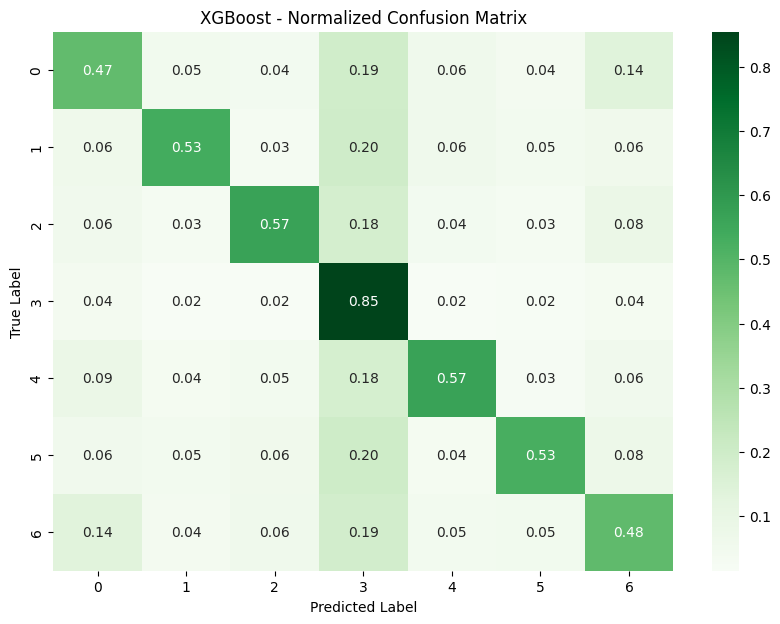

In [12]:
#XGboost
x_val = val_df.drop("label_move_col", axis=1)
y_val = val_df["label_move_col"]

xgb_model = XGBClassifier(
    n_estimators=3000,
    learning_rate=0.02,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.25,
    reg_alpha=0.1,
    reg_lambda=0.7,
    min_child_weight=2,
    objective='multi:softprob',
    random_state=42,
    num_class=7,
    eval_metric='mlogloss'
)

# Train the model
xgb_model.fit(
    x, y,
    eval_set=[(x_val, y_val)],
    verbose=False
)

# Validation

# Evaluate on training data
y_train_pred = xgb_model.predict(x)
train_acc = accuracy_score(y, y_train_pred)

# Evaluate on validation data
y_val_pred = xgb_model.predict(x_val)
val_acc = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", round(train_acc, 4))
print("Validation Accuracy:", round(val_acc, 4))

# Confusion matrix
cm_xgb = confusion_matrix(y_val, y_val_pred)
cm_xgb_norm = cm_xgb.astype('float') / cm_xgb.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,7))
sns.heatmap(cm_xgb_norm, annot=True, fmt=".2f", cmap="Greens",
            xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("XGBoost - Normalized Confusion Matrix")
plt.show()


In [13]:
# Select the same features used for training
used_features = [c for c in train_df.columns if c not in ["label_move_col", "id"]]
x_test = test_df[used_features]

# Generate predictions using XGBoost model
test_pred = xgb_model.predict(x_test)

# If 'id' column doesn't exist in test.csv, create it from the index
if "id" in test_df.columns:
    ids = test_df["id"]
else:
    ids = test_df.index + 1  # start IDs at 1

submission = pd.DataFrame({
    "id": ids,
    "predicted_move": test_pred.astype(int)
})

submission.to_csv("xgb1_submission.csv", index=False)
print("Saved: xgb1_submission.csv (format: id,predicted_move)")


Saved: xgb1_submission.csv (format: id,predicted_move)


In [14]:
# Classic Gradient Boosting (sklearn)
gb = GradientBoostingClassifier(
    loss="log_loss",
    learning_rate=0.09,
    n_estimators=1199,
     max_depth=4,
    min_samples_leaf=25,    # helps generalization
    subsample=0.9,          # stochastic boosting
    random_state=42,
    validation_fraction=0.15, # for early stopping
    n_iter_no_change=60        # stop when no val improvement
)
gb.fit(x, y)

,loss,'log_loss'
,learning_rate,0.09
,n_estimators,1199
,subsample,0.9
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,25
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


Validation Accuracy: 0.6106367180248747
train 0.7410037405236733


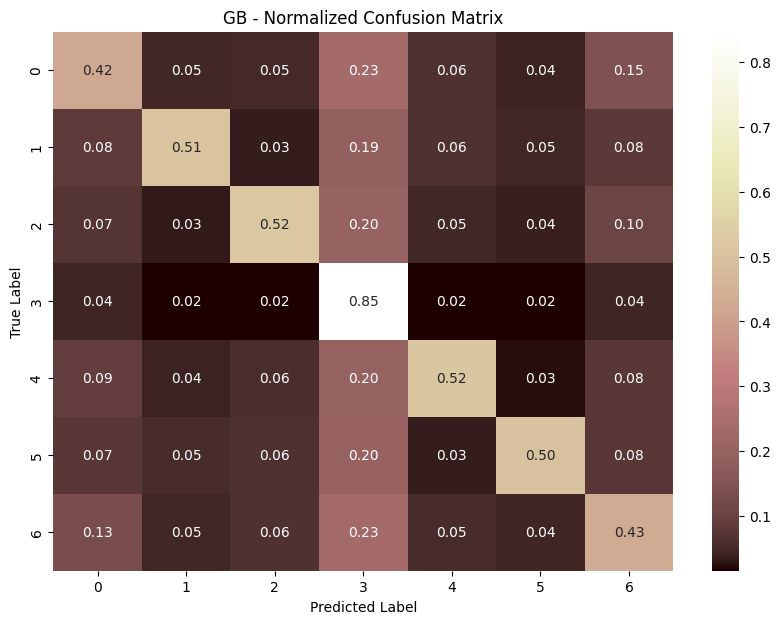

In [15]:
y_val_pred = gb.predict(x_val)
# Evaluate Validation
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
# Evaluate Training
y_train_pred = gb.predict(x)
train_acc = accuracy_score(y, y_train_pred)
print ("train",train_acc)
cm_gb=confusion_matrix(y_val,y_val_pred,normalize='true')
plt.figure(figsize=(10,7))
sns.heatmap(cm_gb, annot=True, fmt=".2f", cmap="pink",
            xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("GB - Normalized Confusion Matrix")
plt.show()

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, 

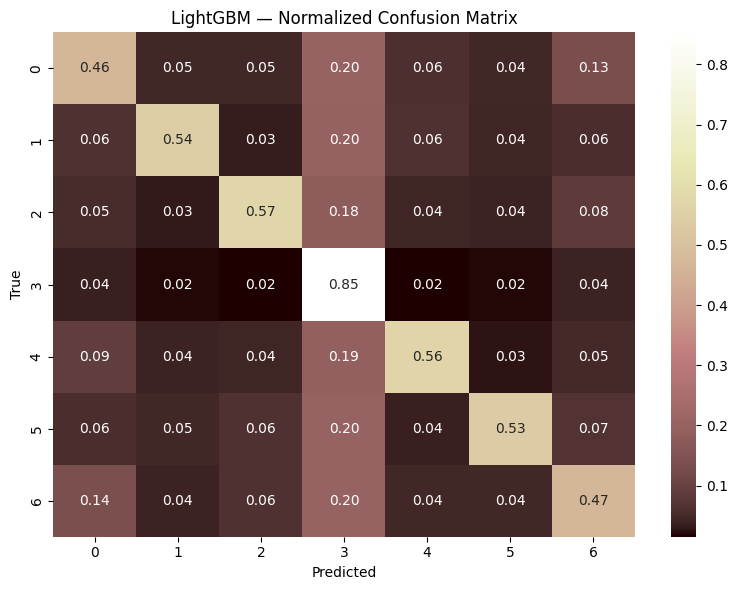

In [16]:
#lightGBM

num_class = len(np.unique(y))

lgbm = lgb.LGBMClassifier(
    objective="multiclass",
    num_class=num_class,
    learning_rate=0.04,    # The speed for the model
    n_estimators=1200,    # More trees + early stopping
    num_leaves=55,
    max_depth=-1,         # Main control
    min_data_in_leaf=40,  # smoother leaves = less overfit
    feature_fraction=0.8,
    bagging_fraction=0.9,
    bagging_freq=1,
    reg_lambda=2.0,
    random_state=42,
    n_jobs=-1
)


lgbm.fit(
    x, y,
    eval_set=[(x_val, y_val)],
    eval_metric="multi_logloss",
    callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=False)]
)

# Evaluate Validation
y_val_pred = lgbm.predict(x_val)
acc = accuracy_score(y_val, y_val_pred)
print("LightGBM Validation Accuracy:", round(acc, 4))
# Evaluate Training
y_train_pred = lgbm.predict(x)
train_acc = accuracy_score(y, y_train_pred)
print ("train",train_acc)
cm_light = confusion_matrix(y_val, y_val_pred, normalize="true")
plt.figure(figsize=(8,6))
sns.heatmap(cm_light, annot=True, fmt=".2f", cmap="pink",
            xticklabels=sorted(np.unique(y_val)),
            yticklabels=sorted(np.unique(y_val)))
plt.title("LightGBM — Normalized Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.tight_layout(); plt.show()


In [17]:
# Select the same features used for training
used_features = [c for c in train_df.columns if c not in ["label_move_col", "id"]]
x_test = test_df[used_features]

# Generate predictions using LightGBM model
test_pred = lgbm.predict(x_test)

# If 'id' column doesn't exist in test.csv, create it from the index
if "id" in test_df.columns:
    ids = test_df["id"]
else:
    ids = test_df.index + 1  # start IDs at 1

submission = pd.DataFrame({
    "id": ids,
    "predicted_move": test_pred.astype(int)
})

submission.to_csv("lgbm_submission.csv", index=False)
print("Saved: lgbm_submission.csv (format: id,predicted_move)")

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
Saved: lgbm_submission.csv (format: id,predicted_move)


In [18]:
df = train_df.copy()
# Feature engineering
# Normalize board for current turn
for i in range(1, 43):
    df[f'p{i}'] = df[f'p{i}'] * df['turn']

# Column sums
for c in range(7):
    cols = [f'p{r}' for r in range(c + 1, 43, 7)]
    df[f'col{c+1}_sum'] = df[cols].sum(axis=1)

# Center control
center_idx = [4, 11, 18, 25, 32, 39]
df['center_control'] = df[[f'p{i}' for i in center_idx]].sum(axis=1)

# Count totals
df['my_pieces'] = (df[[f'p{i}' for i in range(1, 43)]] == 1).sum(axis=1)
df['opp_pieces'] = (df[[f'p{i}' for i in range(1, 43)]] == -1).sum(axis=1)
df['empty_cells'] = (df[[f'p{i}' for i in range(1, 43)]] == 0).sum(axis=1)

# Save new version
df.to_csv("train_engineered.csv", index=False)

x_val_processed = val_df.drop("label_move_col", axis=1)
# Feature engineering for validation data
# Normalize board for current turn
for i in range(1, 43):
    x_val_processed[f'p{i}'] = x_val_processed[f'p{i}'] * x_val_processed['turn']

# Column sums
for c in range(7):
    cols = [f'p{r}' for r in range(c + 1, 43, 7)]
    x_val_processed[f'col{c+1}_sum'] = x_val_processed[cols].sum(axis=1)

# Center control
center_idx = [4, 11, 18, 25, 32, 39]
x_val_processed['center_control'] = x_val_processed[[f'p{i}' for i in center_idx]].sum(axis=1)

# Count totals
x_val_processed['my_pieces'] = (x_val_processed[[f'p{i}' for i in range(1, 43)]] == 1).sum(axis=1)
x_val_processed['opp_pieces'] = (x_val_processed[[f'p{i}' for i in range(1, 43)]] == -1).sum(axis=1)
x_val_processed['empty_cells'] = (x_val_processed[[f'p{i}' for i in range(1, 43)]] == 0).sum(axis=1)

In [23]:
#neural networks model

def build_nn_model(num_classes, input_shape):
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(512),
        layers.LeakyReLU(negative_slope=0.05),  # 'alpha' deprecated → use negative_slope
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(128),
        layers.LeakyReLU(negative_slope=0.05),
        layers.BatchNormalization(),
        layers.Dropout(0.25),
        layers.Dense(64, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_nn_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Apply feature engineering to validation data
# Normalize board for current turn
for i in range(1, 43):
    x_val_processed[f'p{i}'] = x_val_processed[f'p{i}'] * x_val_processed['turn']

# Column sums
for c in range(7):
    cols = [f'p{r}' for r in range(c + 1, 43, 7)]
    x_val_processed[f'col{c+1}_sum'] = x_val_processed[cols].sum(axis=1)

# Center control
center_idx = [4, 11, 18, 25, 32, 39]
x_val_processed['center_control'] = x_val_processed[[f'p{i}' for i in center_idx]].sum(axis=1)

# Count totals
x_val_processed['my_pieces'] = (x_val_processed[[f'p{i}' for i in range(1, 43)]] == 1).sum(axis=1)
x_val_processed['opp_pieces'] = (x_val_processed[[f'p{i}' for i in range(1, 43)]] == -1).sum(axis=1)
x_val_processed['empty_cells'] = (x_val_processed[[f'p{i}' for i in range(1, 43)]] == 0).sum(axis=1)


num_classes = 7
input_shape = x_scaled.shape[1]

nn_pipeline = Pipeline([
    ('scaler', StandardScaler()),   # scale numeric features
    ('nn', KerasClassifier(
        model=build_nn_model,
        model__num_classes=num_classes, # Pass num_classes to the model build function
        model__input_shape=input_shape, # Pass input_shape to the model build function
        epochs=200,
        batch_size=32,
        callbacks=[keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)],
        verbose=1
    ))
])

Epoch 1/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3100 - loss: 1.9657 - val_accuracy: 0.4519 - val_loss: 1.4781
Epoch 2/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4137 - loss: 1.5703 - val_accuracy: 0.4828 - val_loss: 1.3913
Epoch 3/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4426 - loss: 1.4926 - val_accuracy: 0.4994 - val_loss: 1.3429
Epoch 4/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4621 - loss: 1.4489 - val_accuracy: 0.5168 - val_loss: 1.3093
Epoch 5/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4661 - loss: 1.4198 - val_accuracy: 0.5342 - val_loss: 1.2711
Epoch 6/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4805 - loss: 1.3876 - val_accuracy: 0.5391 - val_loss: 1.2485
Epoch 7/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4866 - loss: 1.3652 - val_accuracy: 0.5474 - val_loss: 1.2204
Epoch 8/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4998 

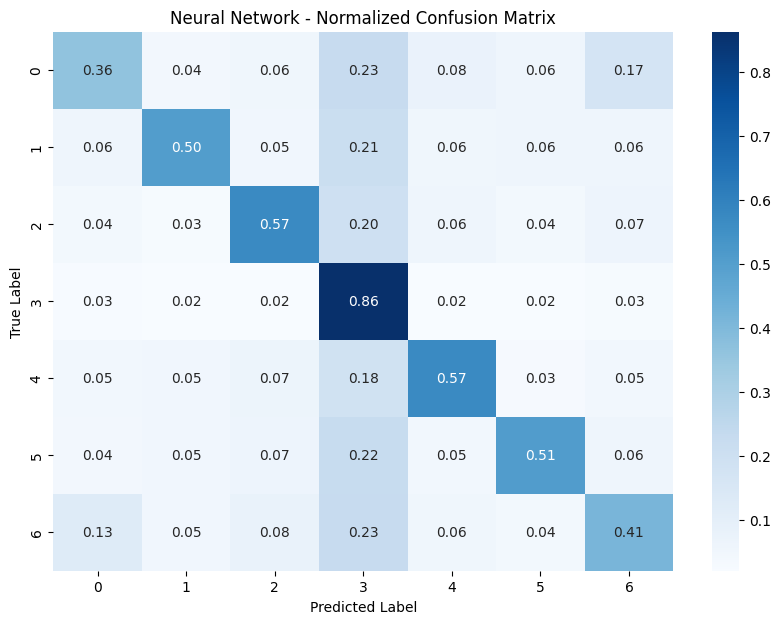

In [26]:
# Apply feature engineering to training data first
df_train_processed = train_df.copy()
for i in range(1, 43):
    df_train_processed[f'p{i}'] = df_train_processed[f'p{i}'] * df_train_processed['turn']
for c in range(7):
    cols = [f'p{r}' for r in range(c + 1, 43, 7)]
    df_train_processed[f'col{c+1}_sum'] = df_train_processed[cols].sum(axis=1)
center_idx = [4, 11, 18, 25, 32, 39]
df_train_processed['center_control'] = df_train_processed[[f'p{i}' for i in center_idx]].sum(axis=1)
df_train_processed['my_pieces'] = (df_train_processed[[f'p{i}' for i in range(1, 43)]] == 1).sum(axis=1)
df_train_processed['opp_pieces'] = (df_train_processed[[f'p{i}' for i in range(1, 43)]] == -1).sum(axis=1)
df_train_processed['empty_cells'] = (df_train_processed[[f'p{i}' for i in range(1, 43)]] == 0).sum(axis=1)

# Apply feature engineering to validation data
df_val_processed = val_df.copy()
for i in range(1, 43):
    df_val_processed[f'p{i}'] = df_val_processed[f'p{i}'] * df_val_processed['turn']
for c in range(7):
    cols = [f'p{r}' for r in range(c + 1, 43, 7)]
    df_val_processed[f'col{c+1}_sum'] = df_val_processed[cols].sum(axis=1)
center_idx = [4, 11, 18, 25, 32, 39]
df_val_processed['center_control'] = df_val_processed[[f'p{i}' for i in center_idx]].sum(axis=1)
df_val_processed['my_pieces'] = (df_val_processed[[f'p{i}' for i in range(1, 43)]] == 1).sum(axis=1)
df_val_processed['opp_pieces'] = (df_val_processed[[f'p{i}' for i in range(1, 43)]] == -1).sum(axis=1)
df_val_processed['empty_cells'] = (df_val_processed[[f'p{i}' for i in range(1, 43)]] == 0).sum(axis=1)


scaler = StandardScaler()
# Fit the scaler on the processed training data
x_scaled = scaler.fit_transform(df_train_processed.drop("label_move_col", axis=1))
# Transform the processed validation data
x_val_scaled = scaler.transform(df_val_processed.drop("label_move_col", axis=1))

num_classes = 7
input_shape = x_scaled.shape[1]
nn_model_direct = build_nn_model(num_classes, input_shape)


early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

history = nn_model_direct.fit(
    x_scaled,
    y,
    epochs=200,
    batch_size=32,
    validation_data=(x_val_scaled, y_val),
    callbacks=[early_stopping],
    verbose=1
)

y_val_pred_probs = nn_model_direct.predict(x_val_scaled)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)


print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Confusion matrix for Neural Network
cm_nn = confusion_matrix(y_val, y_val_pred)
cm_nn_norm = cm_nn.astype('float') / cm_nn.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,7))
sns.heatmap(cm_nn_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Neural Network - Normalized Confusion Matrix")
plt.show()


 Hybrid Model 2: XGBoost + Random Forest ===
Validation Accuracy (Hybrid 2): 0.6375533692222016
Training Accuracy (Hybrid 2): 0.8925649590942732


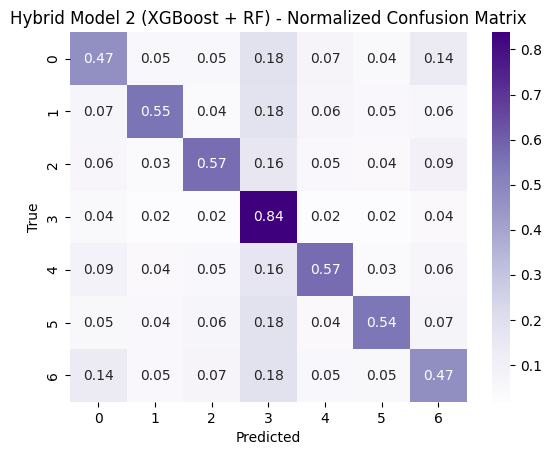

In [27]:
#  Hybrid Model 2: XGBoost + Random Forest

print("\n Hybrid Model 2: XGBoost + Random Forest ===")
xgb_pred = xgb_model.predict(x_val)
xgb_probs = xgb_model.predict_proba(x_val)
rf_probs = rf_model.predict_proba(x_val)

avg_probs = (xgb_probs + rf_probs) / 2.0

hybrid2_pred = np.argmax(avg_probs, axis=1)

print("Validation Accuracy (Hybrid 2):", accuracy_score(y_val, hybrid2_pred))

xgb_train_probs = xgb_model.predict_proba(x)
rf_train_probs = rf_model.predict_proba(x)
avg_train_probs = (xgb_train_probs + rf_train_probs) / 2.0
y_train_pred = np.argmax(avg_train_probs, axis=1)

# Training accuracy
train_acc = accuracy_score(y, y_train_pred)
print("Training Accuracy (Hybrid 2):", train_acc)

cm_hybrid2 = confusion_matrix(y_val, hybrid2_pred, normalize='true')
sns.heatmap(cm_hybrid2, annot=True, fmt=".2f", cmap="Purples")
plt.title("Hybrid Model 2 (XGBoost + RF) - Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Hybrid Model 3: XGBoost + RF + NN 
Epoch 1/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.3144 - loss: 1.9429
Epoch 2/200
  25/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4506 - loss: 1.5142

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4174 - loss: 1.5649
Epoch 3/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4356 - loss: 1.5008
Epoch 4/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4517 - loss: 1.4618
Epoch 5/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4666 - loss: 1.4256
Epoch 6/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4780 - loss: 1.3989
Epoch 7/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4904 - loss: 1.3613
Epoch 8/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4954 - loss: 1.3456
Epoch 9/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5056 - loss: 1.3271
Epoch 10/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5125 - loss: 1.3129
Epoch 11/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5164 - loss: 1.3014
Epoch 12/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5172 - loss: 1.2939
Epoch 13/200
1563/1

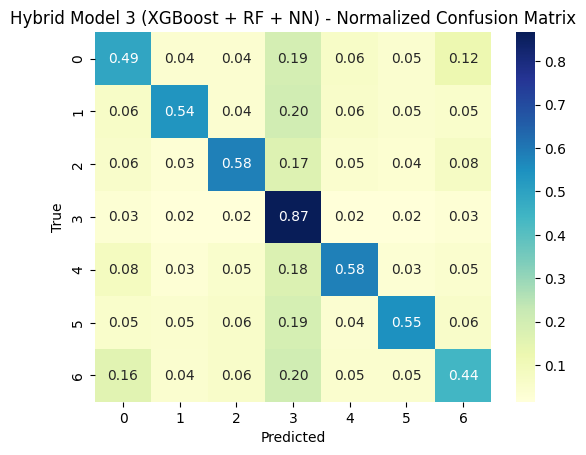

In [29]:
#  Hybrid Model 3: XGBoost + Random Forest + Neural Network

print("\nHybrid Model 3: XGBoost + RF + NN ")

# Fit the nn_pipeline
nn_pipeline.fit(x_scaled, y)

xgb_probs = xgb_model.predict_proba(x_val)
rf_probs = rf_model.predict_proba(x_val)
nn_probs = nn_pipeline.predict_proba(x_val_scaled)

avg_probs = (xgb_probs + rf_probs + nn_probs) / 3.0

hybrid3_pred = np.argmax(avg_probs, axis=1)
# Training accuracy
# Need to calculate training accuracy for the hybrid model, not just print the old one
# xgb_train_probs = xgb_model.predict_proba(x)
# rf_train_probs = rf_model.predict_proba(x)
# nn_train_probs = nn_pipeline.predict_proba(x_scaled)
# avg_train_probs = (xgb_train_probs + rf_train_probs + nn_train_probs) / 3.0
# y_train_pred_hybrid3 = np.argmax(avg_train_probs, axis=1)
# train_acc_hybrid3 = accuracy_score(y, y_train_pred_hybrid3)
# print("Training Accuracy (Hybrid 3):", train_acc_hybrid3)


print("Validation Accuracy (Hybrid 3):", accuracy_score(y_val, hybrid3_pred))

cm_hybrid3 = confusion_matrix(y_val, hybrid3_pred, normalize='true')
sns.heatmap(cm_hybrid3, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Hybrid Model 3 (XGBoost + RF + NN) - Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()